# Data Preparation

In [14]:

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel(fr'data\fastmarkets_test.xlsx', sheet_name='Price Data')
specs = pd.read_excel(fr'data\fastmarkets_test.xlsx', sheet_name='Brands & Specs')

data = pd.merge(df, specs, on='Brand', suffixes=('_remove', ''))
data = data.drop([i for i in data.columns if 'remove' in i], axis=1)
data['Coefficient'] = data['Price (RMB/tonne)'].div(data['FINAL INDEX VALUE (RMB/tonne)'])
data = data.set_index('Date')

# Q1 
On which day in 2018 was the index at its highest level?

In [3]:
data['FINAL INDEX VALUE (RMB/tonne)'].idxmax().strftime('%d-%m-%y')


'10-01-18'

# Q2

What is the most frequently observed brand, and what percentage of the total data points does it account for?

In [4]:
points = data.groupby('Brand')['FINAL INDEX VALUE (RMB/tonne)'].count()
points

Brand
BRBF              34
Blended Fines    109
IOCJ              87
Jimblebar         66
Mac               36
Newman            62
PB               582
SSF              179
Yandi             19
Name: FINAL INDEX VALUE (RMB/tonne), dtype: int64

In [5]:
points.idxmax(), points.div(points.sum()).mul(100).round(3).max()

('PB', 49.574)

<AxesSubplot: ylabel='Brand'>

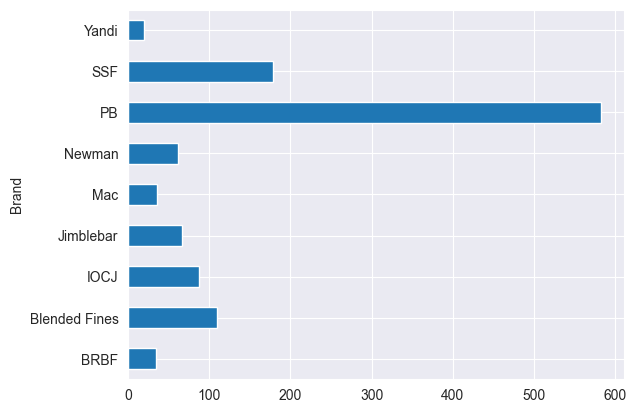

In [77]:
points.plot(kind='barh')

# Q3

Make a graph of the monthly average of the ‘Final Index Value’ during 2018. Also display the maximum and minimum Final Index Values during each month period.

In [6]:
graph = data.groupby(data.index.month)['FINAL INDEX VALUE (RMB/tonne)'].agg(['mean','max', 'min'])
graph

,mean,max,min
Date,,,
1,547.523077,565,532
2,546.695122,564,532
3,494.590164,556,450
4,467.653846,483,454
5,474.849711,488,461
6,468.403141,481,458
7,475.264706,493,463
8,497.310811,510,482


<AxesSubplot: title={'center': 'Monthly Final Index Value'}, xlabel='Date'>

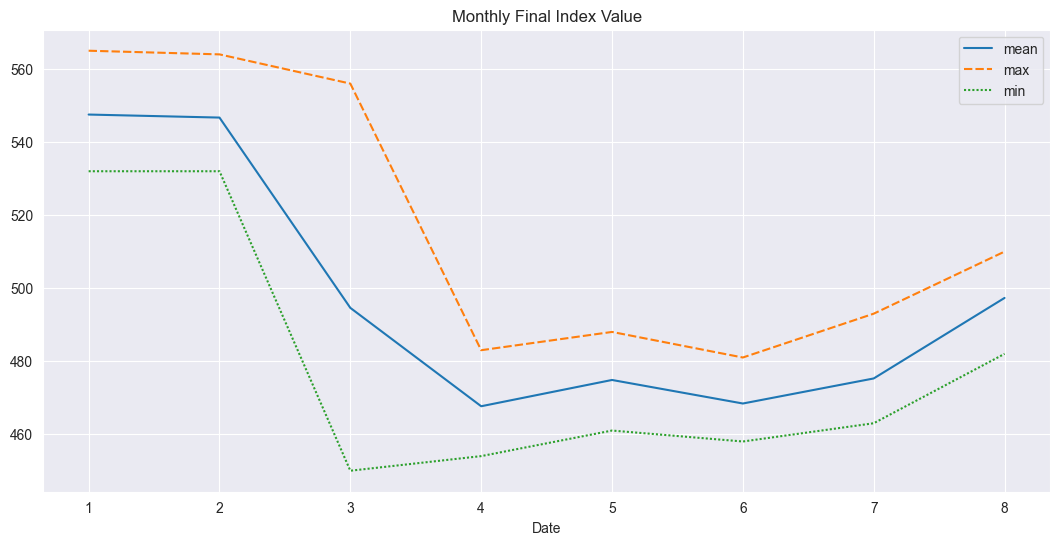

In [8]:

sns.set_style('darkgrid')
fig,ax = plt.subplots(figsize=(13,6))
ax.set_title('Monthly Final Index Value')
sns.lineplot(data=graph)

# Q4

Fill in the Si, Al, S & P columns using the data table of brands and specifications on Sheet 2.

In [9]:
data

,Data Source,Type of Data,Brand,Destination Port,Price (RMB/tonne),Tonnage,FINAL INDEX VALUE (RMB/tonne),Coefficient,Company,Fe,Si,Al,S,P
Date,,,,,,,,,,,,,,
2018-01-02,NaN,deal,PB,Caofeidian,542.5,2000,550,0.986364,[RIO],61.0,4.30,2.60,0.012,0.090
2018-01-02,NaN,assessment,PB,Shandong,537.5,2000,550,0.977273,[RIO],61.0,4.30,2.60,0.012,0.090
2018-01-02,NaN,deal,PB,Rizhao,535.0,2000,550,0.972727,[RIO],61.0,4.30,2.60,0.012,0.090
2018-01-03,NaN,deal,PB,Jingtang,548.0,2000,554,0.989170,[RIO],61.0,4.30,2.60,0.012,0.090
2018-01-03,NaN,assessment,PB,Shandong,545.0,2000,554,0.983755,[RIO],61.0,4.30,2.60,0.012,0.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-23,NaN,deal,Yandi,Rizhao,398.0,2000,481,0.827443,[BHP],57.1,6.15,1.55,0.010,0.043
2018-07-24,NaN,deal,Yandi,Lianyungang,400.0,2000,481,0.831601,[BHP],57.1,6.15,1.55,0.010,0.043
2018-07-26,NaN,deal,Yandi,Tianjin,443.0,2000,484,0.915289,[BHP],57.1,6.15,1.55,0.010,0.043


# Q5

Using these coefficients, rank the brands most expensive to least expensive on average during 2018 relative to the Final Index Value. 

In [10]:
mtl = data.groupby('Brand')['Coefficient'].mean().sort_values(ascending=0)
mtl

Brand
IOCJ             1.310871
BRBF             1.073488
Newman           1.032712
PB               0.980884
Mac              0.950152
Jimblebar        0.897823
Yandi            0.835820
Blended Fines    0.668008
SSF              0.599185
Name: Coefficient, dtype: float64

# Q6

What do you notice about the specifications (Fe, Si, Al, S, P) of the brands that are most valuable relative to the Index compared to those that are least valuable?

In [17]:
specs = data.groupby('Brand')['Coefficient','Fe', 'Si', 'Al', 'S', 'P'].mean().loc[mtl.index]
specs

,Coefficient,Fe,Si,Al,S,P
Brand,,,,,,
IOCJ,1.310871,65.0,1.40,1.30,0.010,0.035
BRBF,1.073488,62.0,5.00,1.50,0.060,0.060
Newman,1.032712,62.9,4.00,2.20,0.010,0.085
PB,0.980884,61.0,4.30,2.60,0.012,0.090
Mac,0.950152,60.9,4.70,2.20,0.020,0.085
Jimblebar,0.897823,61.4,4.00,2.90,0.020,0.120
Yandi,0.835820,57.1,6.15,1.55,0.010,0.043
Blended Fines,0.668008,58.3,5.50,2.50,0.035,0.075
SSF,0.599185,56.7,6.30,2.70,0.045,0.058


In [78]:
norm_specs = specs.div(specs.sum(axis=1),axis=0)
norm_specs['Coefficient'] = specs['Coefficient']
norm_specs

,Coefficient,Fe,Si,Al,S,P
Brand,,,,,,
IOCJ,1.310871,0.941267,0.020273,0.018825,0.000145,0.000507
BRBF,1.073488,0.889610,0.071743,0.021523,0.000861,0.000861
Newman,1.032712,0.895658,0.056958,0.031327,0.000142,0.001210
PB,0.980884,0.884277,0.062334,0.037691,0.000174,0.001305
Mac,0.950152,0.884465,0.068259,0.031951,0.000290,0.001234
Jimblebar,0.897823,0.885520,0.057689,0.041824,0.000288,0.001731
Yandi,0.835820,0.869250,0.093623,0.023596,0.000152,0.000655
Blended Fines,0.668008,0.869137,0.081994,0.037270,0.000522,0.001118
SSF,0.599185,0.853888,0.094876,0.040661,0.000678,0.000873


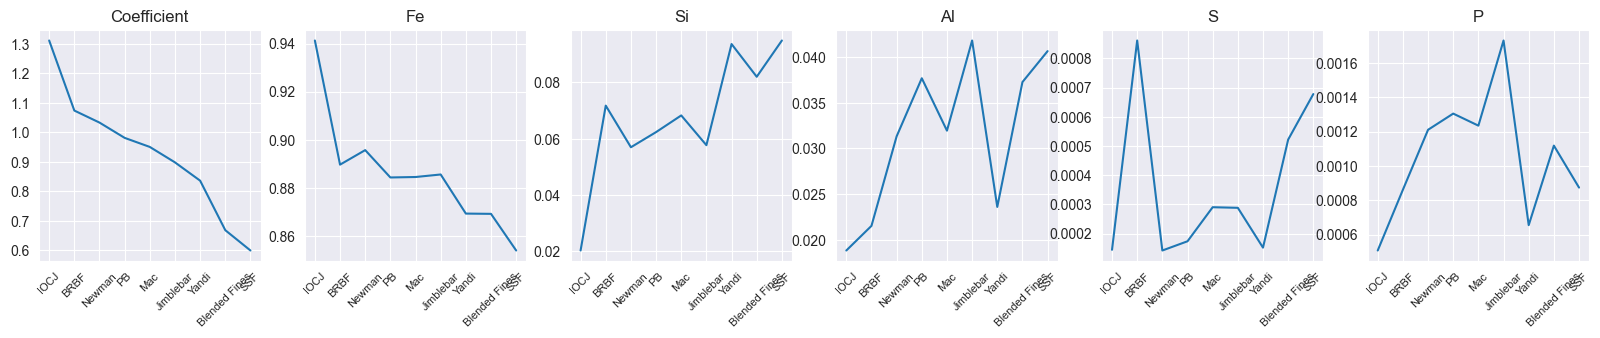

In [76]:
fig, axs = plt.subplots(1, 6, figsize=(20,3))
    
# plot a line plot for each column
for i, col in enumerate(norm_specs.columns):
    axs[i].plot(norm_specs[col])
    axs[i].set_title(col)
    axs[i].tick_params(axis='x', rotation=45, labelsize=8)


We can see that the iron content is highest with the most valuable brand and vice versa. Silicon and aluminium content displays the opposite trend. So, the purer the brand in terms of iron, the more valuable.

# Q7

Which factor (Fe, Si, Al, S or P) appears to have the greatest influence on brand value? How did you determine your answer?

We standardize the features by dividing each feature (column) by it's sum. Then we run OLS. It is clear Fe has the highest impact based on the coefficients of the regression.

In [81]:
_norm_specs = specs.div(specs.sum(axis=0),axis=1)
_norm_specs['Coefficient'] = specs['Coefficient']
_norm_specs

,Coefficient,Fe,Si,Al,S,P
Brand,,,,,,
IOCJ,1.310871,0.119200,0.033857,0.066838,0.045045,0.053763
BRBF,1.073488,0.113699,0.120919,0.077121,0.270270,0.092166
Newman,1.032712,0.115349,0.096735,0.113111,0.045045,0.130568
PB,0.980884,0.111865,0.103990,0.133676,0.054054,0.138249
Mac,0.950152,0.111682,0.113664,0.113111,0.090090,0.130568
Jimblebar,0.897823,0.112599,0.096735,0.149100,0.090090,0.184332
Yandi,0.835820,0.104713,0.148730,0.079692,0.045045,0.066052
Blended Fines,0.668008,0.106914,0.133011,0.128535,0.157658,0.115207
SSF,0.599185,0.103979,0.152358,0.138817,0.202703,0.089094


In [82]:

def regress(df):
    X = df[['Fe', 'Si', 'Al', 'S', 'P']]
    y = df['Coefficient']
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())

In [84]:
regress(_norm_specs)

                            OLS Regression Results                            
Dep. Variable:            Coefficient   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     17.82
Date:                Wed, 19 Apr 2023   Prob (F-statistic):             0.0194
Time:                        17:53:02   Log-Likelihood:                 17.035
No. Observations:                   9   AIC:                            -22.07
Df Residuals:                       3   BIC:                            -20.89
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1869      2.546     -0.859      0.4

# Q8

What effect, if any, does the ‘destination port’ appear to have on price? 

In [222]:
data.groupby('Destination Port')['Coefficient'].agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
Destination Port,,
Huanghua,15,1.014718
Tianjin,52,0.962834
Shandong,135,0.949669
Rizhao,198,0.932743
Lianyungang,28,0.931229
caofeidian,11,0.908630
Qingdao,106,0.908332
Caofeidian,285,0.904066
Jingtang,162,0.903859


Shipments going to HuangHua seem to be most expensive and to Tangshan the least expensive. Alternatively, we could one-hot-encode the port then run another regression.

# Q9

The base specification for the Index is shown on Sheet 2. As you can see, it is not identical to any one brand – it is essentially a theoretical cargo specification. To calculate the index, we need to use data of actual brands, and adjust (normalize) their prices to an equivalent for the Index specification. Typically we use relationships identified over a previous period to determine the degree of adjustments we need to make in the present, though relationships change so we update our coefficients regularly. Describe how you would go about normalizing the prices of the various brands traded at the various ports to the Base Specification if you were calculating the index today. 
(This is a discussion question – there’s no right or wrong – just explain statistical methods and/or programs you could use and pros and cons of different approaches)

A: I am unsure on the methodology of index calculation or normalization, but I would use simple linear regression to do so.


# Q10

In the case of Q7, we used a regression to determine the impact of each factor on the brand value. So, multicollinearity could be an issue (E.g features are highly correlated with each other). Another issue is that perhaps other variables were not included, like the port destination.

# Q11

In the case of a regression, we would use the adjusted R2 metric to determine how much variance is captured or explained by the regression model. If we were using some non-linear regression method like a random forest, we would look at the prediction error via a metric like MSE, MAE or MAPE.